# Notebook for the prediction presentation

In [1]:
from src.features.helpers.load_data import load_test_data, load_train_data

train_raw_data = load_train_data()
train_raw_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [9]:
from_id = 100
to_id = 200

In [10]:
from src.models.model_1.data.load_data import load_data as model_1_load_data
from src.models.model_1.model.model import Model as Model1

X_train_model_1, _, _, _ = model_1_load_data(recreate=False)

model1 = Model1(load=True)
y_pred_model_1 = model1.predict(X_train_model_1[from_id:to_id])

In [11]:
from src.models.model_2.data.load_data import load_data as model_2_load_data
from src.models.model_2.model.model import Model as Model2

X_train_model2, y_train, _ = model_2_load_data(recreate=False)
model2 = Model2(load=True)

y_pred_model_2 = model2.predict(X_train_model2[from_id:to_id])
y_train = y_train[from_id:to_id]

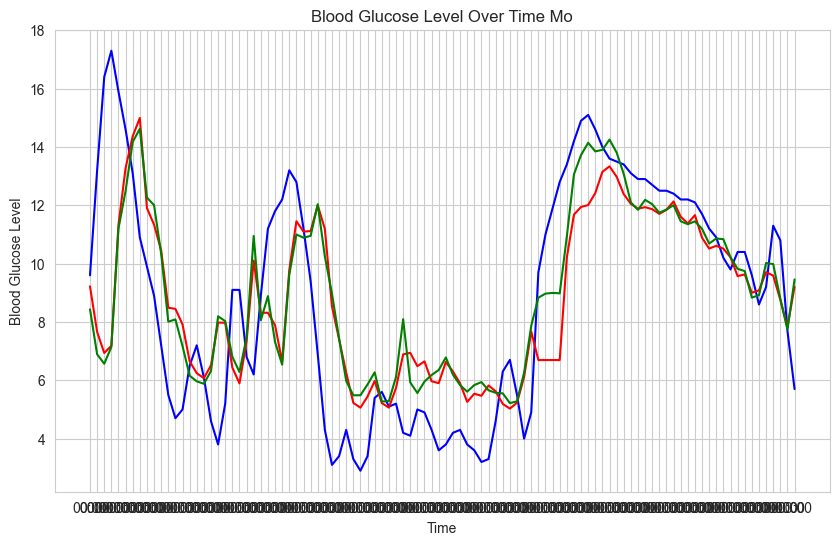

In [12]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual Blood Glucose Level', color='blue')
plt.plot(y_pred_model_1, label='Predicted Blood Glucose Level Model 1', color='red')
plt.plot(y_pred_model_2, label='Predicted Blood Glucose Level Model 2', color='green')

plt.xlabel('Time')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level Over Time Mo')

date_format = mdates.DateFormatter("%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()